In [21]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [5]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [11]:
from keras import models
from keras import regularizers
from keras import  layers
from keras import optimizers, losses, metrics

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\hansr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - acc: 0.5601 - loss: 1.6817 - val_acc: 0.8074 - val_loss: 0.7924
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.6975 - loss: 0.7847 - val_acc: 0.7982 - val_loss: 0.7306
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.7489 - loss: 0.7317 - val_acc: 0.8399 - val_loss: 0.6745
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.7803 - loss: 0.7033 - val_acc: 0.8346 - val_loss: 0.6518
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.7976 - loss: 0.6814 - val_acc: 0.8431 - val_loss: 0.5981
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.8161 - loss: 0.6595 - val_acc: 0.8586 - val_loss: 0.5794
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.8262 - loss: 0.6412 - val_acc: 0.8621 - val_loss: 0.5776
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.8385 - loss: 0.6198 - val_acc: 0.8437 - val_loss: 0.5868
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.833

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

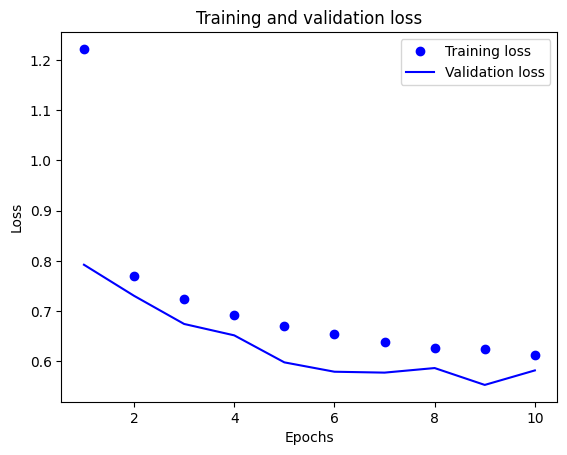

In [18]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

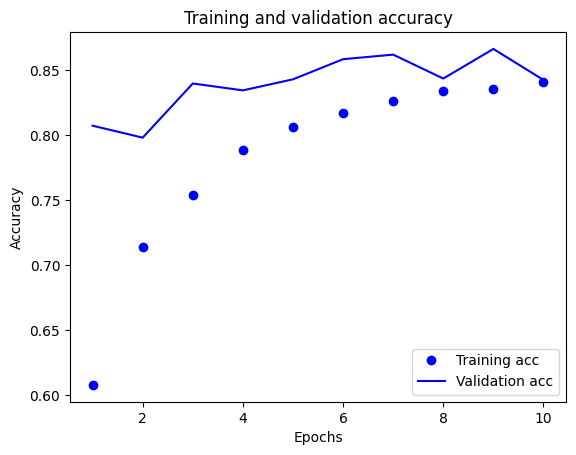

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.31431088],
       [0.9509825 ],
       [0.84553385],
       ...,
       [0.14224346],
       [0.12729427],
       [0.5042525 ]], dtype=float32)